In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
#problem 1.1

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Subset

# Define the transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  #image to tensor
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize with mean and std of MNIST
])

# Download and load the MNIST dataset
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# Create a subset of 1,000 samples
subset_indices = torch.randperm(len(mnist_dataset))[:1000]  # Randomly select 1,000 indices
mnist_subset = Subset(mnist_dataset, subset_indices)

# Checking sample shape and label
sample_image, sample_label = mnist_subset[0]
print(f"Image Shape: {sample_image.shape}, Label: {sample_label}")


Image Shape: torch.Size([1, 28, 28]), Label: 8


In [16]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


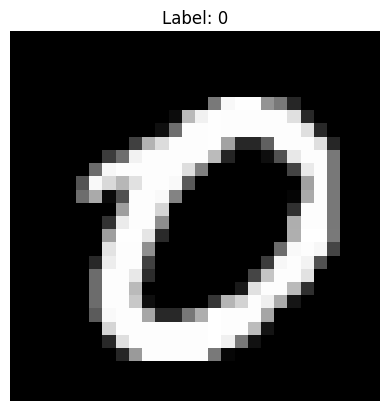

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# a sample image from the MNIST subset
image, label = mnist_subset[1]  # First image from the subset

# Convert from tensor (C, H, W) to (H, W) and plot
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension and display
plt.title(f"Label: {label}")
plt.axis("off")
plt.show()


In [ ]:
#problem 1.2

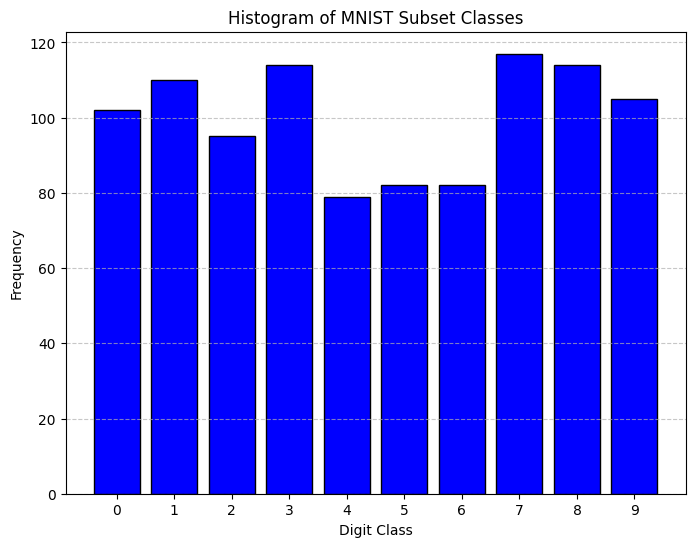

In [4]:
import matplotlib.pyplot as plt
# Extract labels from the subset
labels = [mnist_subset[i][1] for i in range(len(mnist_subset))]

# Plot histogram of class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=range(11), align='left', rwidth=0.8, color='blue', edgecolor='black')
plt.xticks(range(10))  # Digits 0-9
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.title("Histogram of MNIST Subset Classes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#problem 1.3

In [25]:
pip install einops

Note: you may need to restart the kernel to use updated packages.


In [5]:
from torch.utils.data import Subset, DataLoader
from einops import rearrange

# Extract images and labels from the subset
images = torch.stack([mnist_subset[i][0] for i in range(len(mnist_subset))]) 
labels = torch.tensor([mnist_subset[i][1] for i in range(len(mnist_subset))])  

# Reshape using einops: [1000, 1, 28, 28] → [40, 25, 1, 28, 28]
batch_size = 25
batched_images = rearrange(images, '(b s) c h w -> b s c h w', s=batch_size)
batched_labels = rearrange(labels, '(b s) -> b s', s=batch_size)


In [6]:
print("Batched Image Shape:", batched_images.shape)  
print("Batched Label Shape:", batched_labels.shape)  

Batched Image Shape: torch.Size([40, 25, 1, 28, 28])
Batched Label Shape: torch.Size([40, 25])


In [ ]:
#problem 1.4

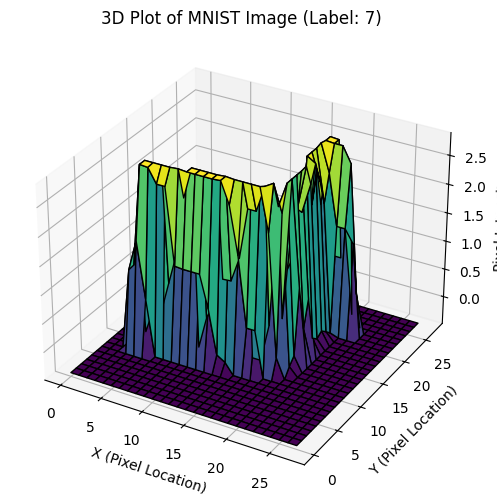

In [7]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# Randomly select one image sample
random_idx = torch.randint(0, len(mnist_dataset), (1,)).item()
image, label = mnist_dataset[random_idx]

# Convert the image tensor to a NumPy array
image_np = image.squeeze().numpy()  # Shape: (28, 28)

# Generate x, y grid coordinates
x = np.arange(28)
y = np.arange(28)
X, Y = np.meshgrid(x, y)

# Plot the 3D surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Create the surface plot
ax.plot_surface(X, Y, image_np, cmap='viridis', edgecolor='k')

# Labels and title
ax.set_xlabel("X (Pixel Location)")
ax.set_ylabel("Y (Pixel Location)")
ax.set_zlabel("Pixel Intensity")
ax.set_title(f"3D Plot of MNIST Image (Label: {label})")

plt.show()


In [39]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 116.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#problem 2.2.1

In [10]:
# Load the dataset (replace with the correct path to the file)
df = pd.read_csv('energydata_complete.csv')

# Display the first few rows to inspect the data structure
print(df.head())

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])


                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

                  date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility

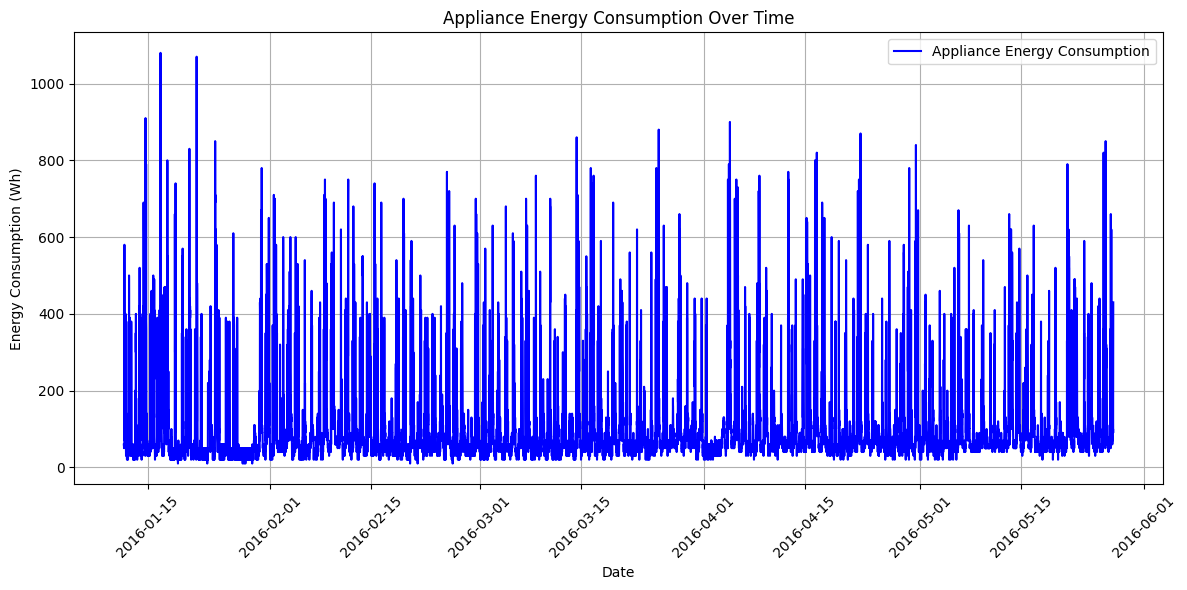

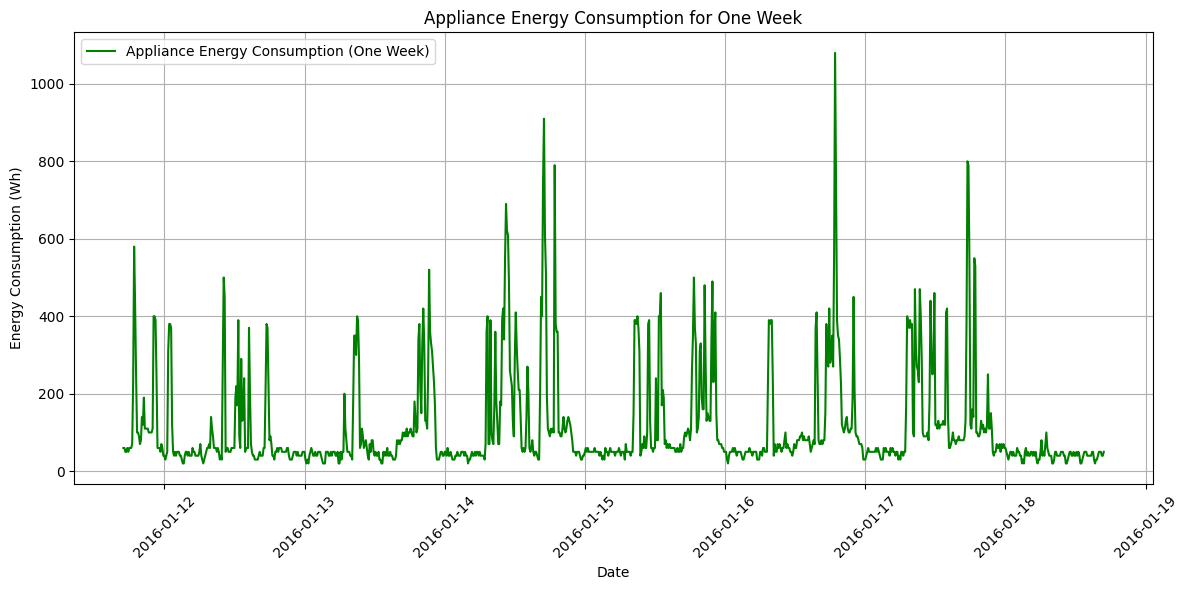

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with the correct path to the file)
df = pd.read_csv('energydata_complete.csv')

# Display the first few rows to inspect the data structure
print(df.head())

# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Plotting energy consumption over the entire period
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['Appliances'], label='Appliance Energy Consumption', color='blue')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliance Energy Consumption Over Time')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting energy consumption for one week (let's choose the first week)
start_date = df['date'].min()
end_date = start_date + pd.Timedelta(weeks=1)

# Filter the data for this one-week period
df_one_week = df[(df['date'] >= start_date) & (df['date'] < end_date)]

# Plot the energy consumption for this week
plt.figure(figsize=(12, 6))
plt.plot(df_one_week['date'], df_one_week['Appliances'], label='Appliance Energy Consumption (One Week)', color='green')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliance Energy Consumption for One Week')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#problem 2.2.2

/tmp/ipykernel_513178/345016752.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_one_week['Appliances'].resample('H').mean()


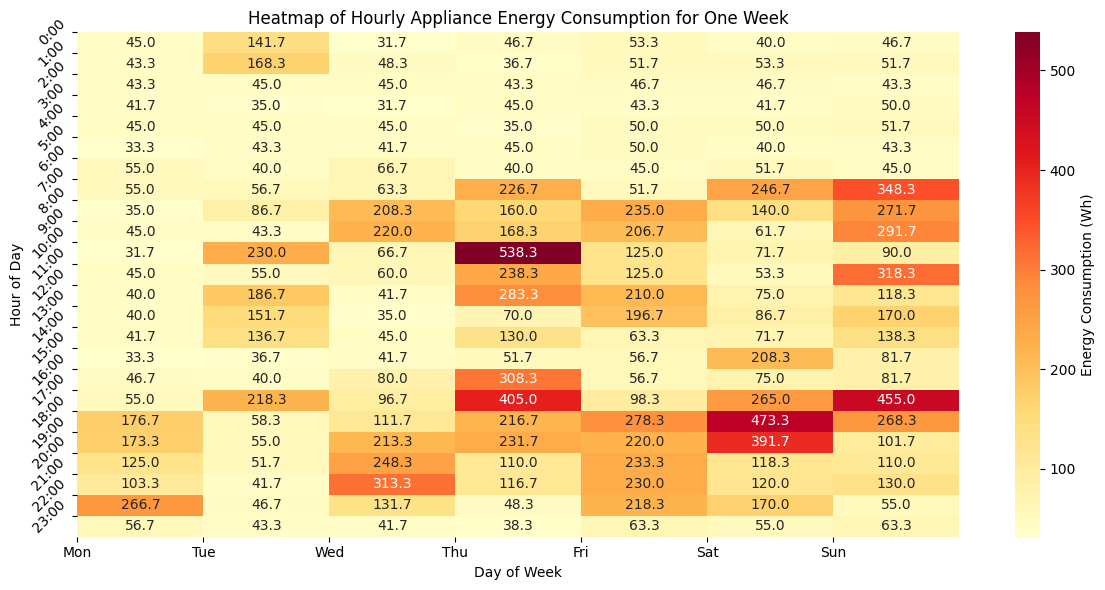

In [16]:
import seaborn as sns

# Select the data for one week (e.g., the first 7 days of data)
start_date = df['date'].min()
end_date = start_date + pd.Timedelta(weeks=1)

# Filter data for the one-week period
df_one_week = df[(df['date'] >= start_date) & (df['date'] < end_date)]

# Set the 'date' column as the index for resampling
df_one_week.set_index('date', inplace=True)

# Resample the data to hourly averages (since the data is in 10-minute intervals)
df_hourly = df_one_week['Appliances'].resample('H').mean()

# Create a new DataFrame for the heatmap, which will be structured by hour of the day and day of the week
df_heatmap = df_hourly.groupby([df_hourly.index.hour, df_hourly.index.weekday]).mean().unstack()

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_heatmap, cmap='YlOrRd', annot=True, fmt='.1f', cbar_kws={'label': 'Energy Consumption (Wh)'})
plt.ylabel('Hour of Day')
plt.xlabel('Day of Week')
plt.title('Heatmap of Hourly Appliance Energy Consumption for One Week')
plt.yticks(ticks=range(0, 24), labels=[f'{i}:00' for i in range(24)], rotation=45)
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#problem 2.2.3

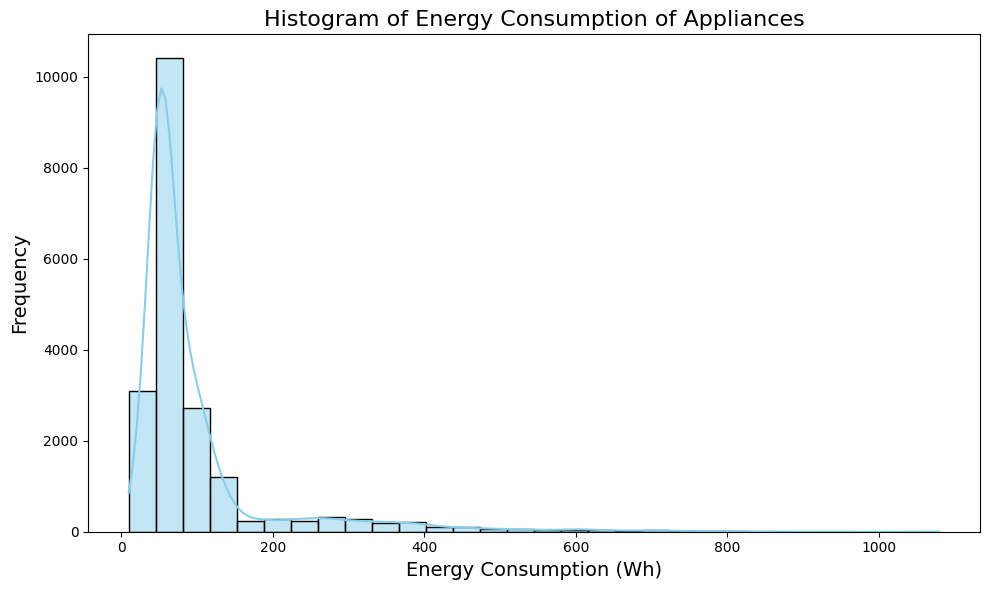

In [45]:
# Plotting the histogram of energy consumption
plt.figure(figsize=(10, 6))
sns.histplot(df['Appliances'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Histogram of Energy Consumption of Appliances', fontsize=16)
plt.xlabel('Energy Consumption (Wh)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
#problem 2.2.4

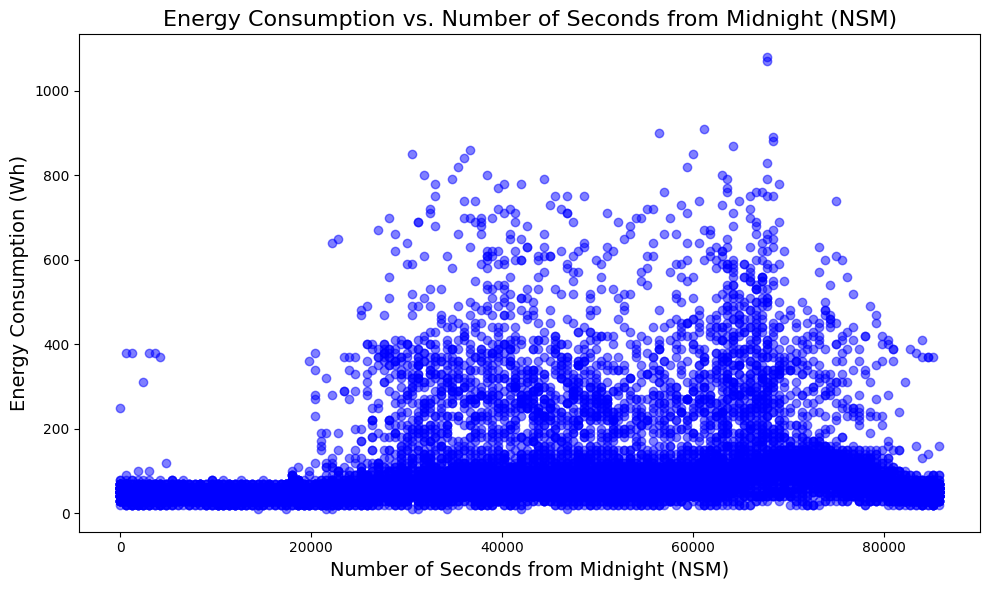

In [46]:

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the time part from the 'date' column
df['time'] = df['date'].dt.time

# Calculate the number of seconds from midnight for each entry
df['NSM'] = df['date'].dt.hour * 3600 + df['date'].dt.minute * 60 + df['date'].dt.second

# Plotting energy consumption vs. NSM (number of seconds from midnight)
plt.figure(figsize=(10, 6))
plt.scatter(df['NSM'], df['Appliances'], alpha=0.5, color='blue')

# Adding titles and labels
plt.title('Energy Consumption vs. Number of Seconds from Midnight (NSM)', fontsize=16)
plt.xlabel('Number of Seconds from Midnight (NSM)', fontsize=14)
plt.ylabel('Energy Consumption (Wh)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#problem 2.2.5

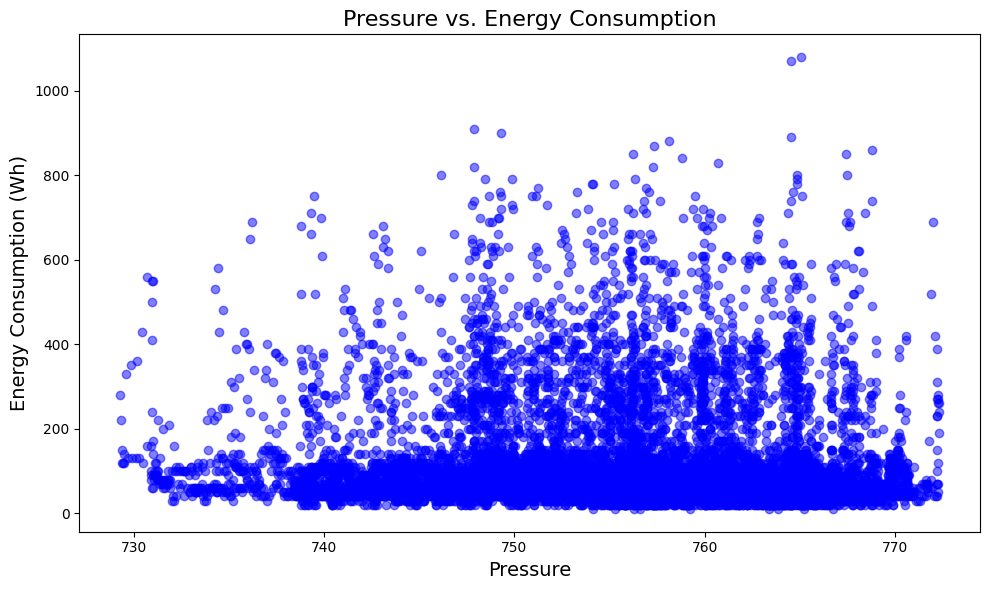

In [47]:

plt.figure(figsize=(10, 6))
plt.scatter(df['Press_mm_hg'], df['Appliances'], alpha=0.5, color='blue')

# Adding titles and labels
plt.title('Pressure vs. Energy Consumption', fontsize=16)
plt.xlabel('Pressure', fontsize=14)
plt.ylabel('Energy Consumption (Wh)', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
## problem 2.2.6

##Press mm Hg (pressure) and NSM (time of day) are the main determinants of energy use; Press mm Hg reflects weather-induced changes, while NSM captures daily patterns. 
##Press mm Hg controls energy needs through atmospheric conditions, whereas NSM influences consumption depending on daily cycles (e.g., heating or cooling at specified hours). When combined, they emphasize how crucial weather and time are to maximizing construction energy use.

In [2]:
pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 140.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Problem 3

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew

# Load the data (modify delimiter based on file structure)
file_path = "airfoil_self_noise.dat"  # Replace with actual file path
data = pd.read_csv(file_path, delim_whitespace=True, header=None)

# Assign column names (assuming there are six columns based on the description)
column_names = [
    "Frequency (Hz)", 
    "Angle of Attack (°)", 
    "Chord Length (m)", 
    "Free-stream Velocity (m/s)", 
    "Suction Side Displacement Thickness (m)", 
    "Scaled Sound Pressure Level (dB)"
]
data.columns = column_names

# Compute descriptive statistics
stats = {}
for column in data.columns:
    stats[column] = {
        "Mean": np.mean(data[column]),
        "Variance": np.var(data[column], ddof=1),
        "Standard Deviation": np.std(data[column], ddof=1),
        "Median": np.median(data[column]),
        "Kurtosis": kurtosis(data[column]),
        "Skewness": skew(data[column]),
        "Range": np.ptp(data[column])
    }

# Convert to DataFrame for better visualization
stats_df = pd.DataFrame(stats).T
print(stats_df)


                                                Mean      Variance  \
Frequency (Hz)                           2886.380572  9.938717e+06   
Angle of Attack (°)                         6.782302  3.502424e+01   
Chord Length (m)                            0.136548  8.749868e-03   
Free-stream Velocity (m/s)                 50.860745  2.425116e+02   
Suction Side Displacement Thickness (m)     0.011140  1.729287e-04   
Scaled Sound Pressure Level (dB)          124.835943  4.759146e+01   

                                         Standard Deviation       Median  \
Frequency (Hz)                                  3152.573137  1600.000000   
Angle of Attack (°)                                5.918128     5.400000   
Chord Length (m)                                   0.093541     0.101600   
Free-stream Velocity (m/s)                        15.572784    39.600000   
Suction Side Displacement Thickness (m)            0.013150     0.004957   
Scaled Sound Pressure Level (dB)                   6.

/tmp/ipykernel_488093/32569673.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
